<a href="https://colab.research.google.com/github/hadeyema/playground-6psrqy2u/blob/master/NetP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet 4**

**Anticipez les besoins en consommation électrique de bâtiments SEATTLE**

Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv Lien vers score Star Energy : https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results

Lien vers la signification des colonnes : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy



In [1]:
import pandas as pd
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

**Importation Datasets**

In [2]:
df2015 = pd.read_csv('/content/2015-building-energy-benchmarking.csv', sep=',',index_col=0)
df2016 = pd.read_csv('/content/2016-building-energy-benchmarking.csv', sep=',',index_col=0)

In [3]:
print(df2015.shape)
print(df2016.shape)

(3340, 46)
(3376, 45)


In [4]:
df2015.head(5)

DataYear    BuildingType  ... SPD Beats Zip Codes
OSEBuildingID                            ...                    
1                  2015  NonResidential  ...      31.0     18081
2                  2015  NonResidential  ...      31.0     18081
3                  2015  NonResidential  ...      31.0     18081
5                  2015  NonResidential  ...      31.0     18081
8                  2015  NonResidential  ...      31.0     19576

[5 rows x 46 columns]

In [5]:
df2016.head(5)

DataYear  ... GHGEmissionsIntensity
OSEBuildingID            ...                      
1                  2016  ...                  2.83
2                  2016  ...                  2.86
3                  2016  ...                  2.19
5                  2016  ...                  4.67
8                  2016  ...                  2.88

[5 rows x 45 columns]

# Nettoyage et Tri des features
**Préparation assemblage des 2 dataframes**

Uniformisation des colonnes des 2 dataframes

In [6]:
# colonnes présentes sur données 2015 et absentes sur 2016
set(df2015) - set(df2016)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [7]:
# colonnes présentes sur données 2016 et absentes sur 2015
set(df2016) - set(df2015)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

2015 et 2016 n'ont pas la meme definition de la location , nous allons donc uniformiser cela



In [8]:
ast.literal_eval(df2015['Location'][1])

{'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}',
 'latitude': '47.61219025',
 'longitude': '-122.33799744'}

In [9]:
df2015['Latitude']=df2015['Location'].apply(lambda l : ast.literal_eval(l)['latitude'])
df2015['Longitude']=df2015['Location'].apply(lambda l : ast.literal_eval(l)['longitude'])
df2015['State']=df2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['state'])
df2015['ZipCode']=df2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['zip'])
df2015['City']=df2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['city'])
df2015['Address']=df2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['address'])

In [10]:
df2015['TotalGHGEmissions']=df2015['GHGEmissions(MetricTonsCO2e)']
df2015['GHGEmissionsIntensity']=df2015['GHGEmissionsIntensity(kgCO2e/ft2)']

In [11]:
# 2015 et 2016 sont alligne et prets a etre concatener
set(df2015) - set(df2016)
set(df2016) - set(df2015)

{'Comments'}

**Suppression des colonnes non itules et redondants**



1.   redondants: 'Location', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Zip Codes'

2.   inutules


* 'SPD Beats', (Police information)
* 'Seattle Police Department Micro Community Policing Plan Areas', (Police information)
* 'OtherFuelUse(kBtu)', (largely incomplete)
* '2010 Census Tracts',
* 'City Council Districts',
* 'Comment' (misc text info largely incomplete)







In [12]:
df2015.drop(['Location','GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)', 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas',
               'Zip Codes','OtherFuelUse(kBtu)','2010 Census Tracts','City Council Districts', 'Comment'], axis='columns', inplace=True)

In [13]:
df2016.drop(['Comments'], axis='columns', inplace=True)

In [14]:
#Harminiser les types des colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.DataFrame([df2015.dtypes,df2016.dtypes])

DataYear BuildingType PrimaryPropertyType PropertyName  \
0    int64       object              object       object   
1    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) DefaultData  \
0           float64            float64          float64      object   
1           float64            float64          float64        bool   

  ComplianceStatus Outlier Latitude Longitude   State  ZipCode    City  \
0           object  object   object    object  object   object  object   
1           object  object  float64   float64  object  float64  object   

  Address TotalGHGEmissions GHGEmissionsIntensity  
0  object           float64               float64  
1  object           float64               float64

In [15]:
df2015[['Latitude','Longitude','ZipCode']]=df2015[['Latitude','Longitude','ZipCode']].astype('float64')

In [16]:
df2015['DefaultData'] = df2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()

**Assemblage des 2 dataframes**

In [17]:
data=pd.concat([df2015,df2016],axis=0,ignore_index=True)

In [18]:
print(f'Le dataset concaténé a un total  de {len(data)} lignes')

Le dataset concaténé a un total  de 6716 lignes


Harmonisation des valeurs

In [19]:
for key in list(data.keys()):
    if data[key].nunique()<20:
        print(key,'------->', data[key].unique())
    else:
        print(key, '------->',data[key].nunique())

DataYear -------> [2015 2016]
BuildingType -------> ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType -------> 32
PropertyName -------> 6527
TaxParcelIdentificationNumber -------> 3729
CouncilDistrictCode -------> [7 3 2 4 5 6 1]
Neighborhood -------> ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']
YearBuilt -------> 113
NumberofBuildings -------> [  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]
NumberofFloors -------> 50
PropertyGFATotal -------> 3297
PropertyGFAParking -------> 960
PropertyGFABuilding(s) -------> 3726
ListOfAllPropertyUseTypes -------> 488
LargestPropertyUseType -------> 57
LargestPropertyUseTypeGFA -

In [20]:
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)

In [21]:
data['City'].replace('Seattle', 'SEATTLE', inplace=True)
data['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', 'Missing Data', inplace=True)
data['NumberofBuildings'].replace(0, 1, inplace=True)

In [22]:
# https://python-visualization.github.io/folium/quickstart.html#Getting-Started
import folium
m = folium.Map()
m = folium.Map(location=[df2015['Latitude'].mean(), df2015['Longitude'].mean()], zoom_start=11)
for i in range(0,len(df2015)):
    folium.Circle([df2015.iloc[i]['Latitude'],df2015.iloc[i]['Longitude']], popup=df2015.iloc[i]['Address'], radius =100).add_to(m)
m
#m.save('index.html')

**Analyser les donnees manquantes**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   PropertyName                     6716 non-null   object 
 4   TaxParcelIdentificationNumber    6714 non-null   object 
 5   CouncilDistrictCode              6716 non-null   int64  
 6   Neighborhood                     6716 non-null   object 
 7   YearBuilt                        6716 non-null   int64  
 8   NumberofBuildings                6708 non-null   float64
 9   NumberofFloors                   6708 non-null   float64
 10  PropertyGFATotal                 6716 non-null   int64  
 11  PropertyGFAParking               6716 non-null   int64  
 12  PropertyGFABuilding(

In [24]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('No information')

In [25]:
data['Outlier'].replace(np.nan,'normal',inplace=True)

In [26]:
data.describe()

DataYear  CouncilDistrictCode    YearBuilt  NumberofBuildings  \
count  6716.00000          6716.000000  6716.000000        6708.000000   
mean   2015.50268             4.445057  1968.101549           1.085122   
std       0.50003             2.123749    33.020391           1.588519   
min    2015.00000             1.000000  1900.000000           1.000000   
25%    2015.00000             3.000000  1948.000000           1.000000   
50%    2016.00000             4.000000  1974.000000           1.000000   
75%    2016.00000             7.000000  1996.000000           1.000000   
max    2016.00000             7.000000  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     6708.000000      6.716000e+03         6716.000000   
mean         4.695736      9.281410e+04         9519.597975   
std          5.476218      1.875062e+05        33868.050881   
min          0.000000      1.128500e+04           -3.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.400800e+04            0.000000   
75%          5.000000      8.943125e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            6.716000e+03               6.560000e+03   
mean             8.329450e+04               7.707936e+04   
std              1.733470e+05               1.681617e+05   
min             -5.055000e+04               5.656000e+03   
25%              2.727300e+04               2.501600e+04   
50%              4.218500e+04               3.953000e+04   
75%              8.112000e+04               7.417800e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      6716.000000                     6716.000000   
mean                      13535.428275                     1938.571679   
std                       39689.257069                    11702.088239   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       10206.000000                        0.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      5093.000000       6699.000000         6700.000000   
mean         67.906342         54.182341           57.308522   
std          27.012124         55.101657           56.390651   
min           1.000000          0.000000            0.000000   
25%          52.000000         27.600000           29.600000   
50%          75.000000         38.000000           40.900000   
75%          90.000000         60.200000           64.925001   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         6697.000000           6697.000000         6.701000e+03   
mean           133.510303            138.356802         5.194673e+06   
std            135.677195            135.302508         1.813648e+07   
min             -2.000000             -2.100000         0.000000e+00   
25%             74.000000             79.199997         9.200689e+05   
50%             95.600000            102.099998         1.791071e+06   
75%            143.900000            149.800000         4.135280e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           6.700000e+03    6.697000e+03      6.697000e+03   
mean            5.240110e+06    2.625076e+05      1.052458e+06   
std             1.500896e+07    3.704221e+06      3.659769e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%       

In [27]:
#Supprimer les bâtiments n'affichant aucune consommation d'énergie
index_to_drop = data[data['SiteEnergyUseWN(kBtu)']<1].index
print(index_to_drop)
print(f'il existe {len(index_to_drop)} batiments avec 0 consommation energy -> supprimer')

Int64Index([  44,  207,  451,  492,  572,  578,  614,  894,  966, 1118, 2152,
            2818, 3368, 3371, 3402, 3421, 3425, 3435, 3473, 3479, 3492, 3560,
            3587, 3624, 3644, 3690, 3954, 3970, 4086, 4100, 4222, 4293, 4701,
            4889, 5234, 6506, 6614, 6615, 6617, 6642, 6663],
           dtype='int64')
il existe 41 batiments avec 0 consommation energy -> supprimer


In [28]:
data.drop(index_to_drop, inplace=True, axis=0)

In [29]:
#Vérifiez si il existe des lignes complètes de N/A (à supprimer)
print('# lignes avant:',len(data))
data.dropna(how = 'all', axis=0, inplace=True)
print('# lignes apres:',len(data))

# lignes avant: 6675
# lignes apres: 6675


**Données numériques**

In [30]:
numeric_data = data.drop(['ENERGYSTARScore'], axis=1).select_dtypes(['int32', 'float64']).copy()
numeric_data.shape

(6675, 21)

In [31]:
numeric_data.isna().sum()

NumberofBuildings                    8
NumberofFloors                       8
LargestPropertyUseTypeGFA          155
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseTypeGFA       0
SiteEUI(kBtu/sf)                    15
SiteEUIWN(kBtu/sf)                  16
SourceEUI(kBtu/sf)                  19
SourceEUIWN(kBtu/sf)                19
SiteEnergyUse(kBtu)                 15
SiteEnergyUseWN(kBtu)               16
SteamUse(kBtu)                      19
Electricity(kWh)                    19
Electricity(kBtu)                   19
NaturalGas(therms)                  19
NaturalGas(kBtu)                    19
Latitude                             0
Longitude                            0
ZipCode                             16
TotalGHGEmissions                   19
GHGEmissionsIntensity               19
dtype: int64

**Un certain nombre de ces valeurs ne seront pas pertinentes pour notre modélisation de prédiction**

Nous retiendrons uniquement la consommation d'énergie et les émissions en valeur absolue. On retiendra :

*   SiteEnergyUseWN(kBtu) (consumption normalized for Weather, ie Weather Normalized)
*   TotalGHGEmissions

1.   Les autres colonnes seront supprimées car elles sont corrélées à nos cibles. Valeurs manquantes donc sans importance dans ces colonnes
2.   ZipCode redondant avec géolocalisation Latitude & Longitude qui sont complètes





In [32]:
#Supprimer les colonnes liées à la cible
columns_to_drop = ['SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)',
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'SteamUse(kBtu)',
                    'Electricity(kWh)',
                    'Electricity(kBtu)',
                    'NaturalGas(therms)',
                    'NaturalGas(kBtu)',
                    'OtherFuelUse(kBtu)',
                    'GHGEmissionsIntensity'
                   ]

In [33]:
for column in columns_to_drop:
    try:
        data.drop(column,axis='columns',inplace=True)
    except:
        print(f'colonne {column} pas present')

colonne OtherFuelUse(kBtu) pas present


In [34]:
numeric_data.NumberofBuildings.isna().sum()

8

In [35]:
numeric_data.NumberofBuildings.value_counts()

1.0     6549
2.0       41
3.0       25
4.0       13
5.0       10
6.0        8
7.0        4
8.0        3
10.0       3
9.0        2
14.0       2
16.0       2
11.0       2
39.0       1
23.0       1
27.0       1
Name: NumberofBuildings, dtype: int64

In [36]:
# Remplir avec la valeur la plus représentative
data.NumberofBuildings.replace(np.nan,1,inplace=True)

In [37]:
numeric_data.NumberofFloors.value_counts()

4.0     1390
3.0     1387
1.0      910
2.0      873
6.0      602
5.0      581
7.0      281
8.0      124
11.0      64
10.0      62
13.0      41
12.0      39
9.0       36
14.0      25
0.0       20
17.0      17
15.0      14
24.0      14
16.0      14
18.0      14
23.0      13
19.0      12
26.0      12
33.0      11
42.0      10
21.0      10
25.0      10
27.0       9
22.0       8
20.0       8
29.0       6
41.0       4
28.0       4
37.0       4
31.0       4
36.0       4
34.0       4
55.0       2
30.0       2
49.0       2
32.0       2
40.0       2
63.0       2
99.0       2
39.0       2
46.0       2
76.0       2
38.0       2
47.0       2
56.0       2
Name: NumberofFloors, dtype: int64

In [38]:
data[data.NumberofFloors.isna()]

DataYear        BuildingType         PrimaryPropertyType  \
2015      2015              Campus                       Other   
3171      2015      NonResidential  Non-Refrigerated Warehouse   
3172      2015      NonResidential              Medical Office   
3173      2015      NonResidential              Medical Office   
3193      2015  Nonresidential COS                       Other   
3209      2015  Nonresidential COS                       Other   
3311      2015  Nonresidential COS                       Other   
3313      2015      NonResidential                       Other   

                                                PropertyName  \
2015  KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BASE-CAMPUS   
3171                         SAND POINT BUILDING 5A,5B,5C,5D   
3172                                  SAND POINT BUILDING 25   
3173                                  SAND POINT BUILDING 29   
3193                                  GEORGETOWN STEAM PLANT   
3209                                    MAGNUSON PARK CAMPUS   
3311                       FIRST HILL STREET CAR MAINTENANCE   
3313                  SMILOW RAINIER VISTA BOYS & GIRLS CLUB   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
2015                    7666203387                    2  GREATER DUWAMISH   
3171                     225049077                    4         NORTHEAST   
3172                     225049077                    4         NORTHEAST   
3173                     225049077                    4         NORTHEAST   
3193                           NaN                    2  GREATER DUWAMISH   
3209                     225049062                    4         NORTHEAST   
3311                    8592900285                    2  GREATER DUWAMISH   
3313                    6056110050                    2         SOUTHEAST   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2015       1991               10.0             NaN            180796   
3171       1940                1.0             NaN            384772   
3172       1960                1.0             NaN             30287   
3173       1960                1.0             NaN             21931   
3193       1906                1.0             NaN             39212   
3209       1929                7.0             NaN            502030   
3311       2014                1.0             NaN             20993   
3313       2009                1.0             NaN             40265   

      PropertyGFAParking  PropertyGFABuilding(s)  \
2015                   0                  180796   
3171                   0                  384772   
3172                   0                   30287   
3173                   0                   21931   
3193                   0                   39212   
3209                   0                  502030   
3311                   0                   20993   
3313                   0                   40265   

                            ListOfAllPropertyUseTypes  \
2015                                   Other, Parking   
3171               Non-Refrigerated Warehouse, Office   
3172                                   Medical Office   
3173                                   Medical Office   
3193                                            Other   
3209                               Other - Recreation   
3311  Repair Services (Vehicle, Shoe, Locksmith, etc)   
3313                               Pre-school/Daycare   

                               LargestPropertyUseType  \
2015                                            Other   
3171                       Non-Refrigerated Warehouse   
3172                                   Medical Office   
3173                                   Medical Office   
3193                                            Other   
3209                               Other - Recreation   
3311  Repair Services (Vehicle, Shoe, Locksmith, etc)   
3313                               Pre-school/Daycar

In [39]:
# Remplir avec la valeur la plus représentative
data.NumberofFloors.replace(np.nan,3,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6715
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6675 non-null   int64  
 1   BuildingType                     6675 non-null   object 
 2   PrimaryPropertyType              6675 non-null   object 
 3   PropertyName                     6675 non-null   object 
 4   TaxParcelIdentificationNumber    6673 non-null   object 
 5   CouncilDistrictCode              6675 non-null   int64  
 6   Neighborhood                     6675 non-null   object 
 7   YearBuilt                        6675 non-null   int64  
 8   NumberofBuildings                6675 non-null   float64
 9   NumberofFloors                   6675 non-null   float64
 10  PropertyGFATotal                 6675 non-null   int64  
 11  PropertyGFAParking               6675 non-null   int64  
 12  PropertyGFABuilding(

Non utilisable : 'YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes' (utilisé dans d'autres colonnes), 'PropertyName'
'TaxParcelIdentificationNumber' (tous deux redondants avec BuildingID)

Colonnes avec des valeurs uniques : 'État', 'Ville'

'DefaultData' : informations inconnues

ZipCode, Adresse : redondant avec latitude et longitude

In [41]:
data.drop(['YearsENERGYSTARCertified','PropertyName','TaxParcelIdentificationNumber'], axis='columns',inplace=True)
data.drop(['DefaultData','ListOfAllPropertyUseTypes'],axis='columns',inplace=True)
data.drop(['State', 'City'], axis='columns',inplace=True)
data.drop(['ZipCode', 'Address'], axis='columns',inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6715
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6675 non-null   int64  
 1   BuildingType                     6675 non-null   object 
 2   PrimaryPropertyType              6675 non-null   object 
 3   CouncilDistrictCode              6675 non-null   int64  
 4   Neighborhood                     6675 non-null   object 
 5   YearBuilt                        6675 non-null   int64  
 6   NumberofBuildings                6675 non-null   float64
 7   NumberofFloors                   6675 non-null   float64
 8   PropertyGFATotal                 6675 non-null   int64  
 9   PropertyGFAParking               6675 non-null   int64  
 10  PropertyGFABuilding(s)           6675 non-null   int64  
 11  LargestPropertyUseType           6675 non-null   object 
 12  LargestPropertyUseTy

In [43]:
#Remplir les NA 'LargestPropertyUseTypeGFA' values
data[data['LargestPropertyUseTypeGFA'].isna()]

DataYear          BuildingType          PrimaryPropertyType  \
10        2015        NonResidential                        Hotel   
14        2015        NonResidential                        Hotel   
19        2015        NonResidential                        Hotel   
35        2015        NonResidential          Distribution Center   
52        2015        NonResidential                        Hotel   
160       2015     SPS-District K-12            SPS-District K-12   
194       2015        NonResidential                        Hotel   
201       2015        NonResidential                 Large Office   
204       2015        NonResidential                 Retail Store   
233       2015        NonResidential                 Large Office   
241       2015        NonResidential  Small- and Mid-Sized Office   
251       2015        NonResidential                 Large Office   
263       2015        NonResidential                 Retail Store   
285       2015        NonResidential                 Large Office   
309       2015        NonResidential           Mixed Use Property   
320       2015        NonResidential  Small- and Mid-Sized Office   
346       2015        NonResidential                   Laboratory   
347       2015        NonResidential           Mixed Use Property   
355       2015        NonResidential        Self-Storage Facility   
364       2015        NonResidential  Small- and Mid-Sized Office   
374       2015        NonResidential                 Large Office   
379       2015        NonResidential                        Other   
395       2015        NonResidential  Small- and Mid-Sized Office   
406       2015        NonResidential   Non-Refrigerated Warehouse   
465       2015        NonResidential   Non-Refrigerated Warehouse   
539       2015        NonResidential          Distribution Center   
579       2015        NonResidential  Small- and Mid-Sized Office   
586       2015        NonResidential                 Large Office   
593       2015        NonResidential                        Other   
599       2015        NonResidential       Refrigerated Warehouse   
625       2015        NonResidential  Small- and Mid-Sized Office   
649       2015        NonResidential           Mixed Use Property   
651       2015  Multifamily LR (1-4)        Senior Care Community   
713       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
714       2015  Multifamily HR (10+)        High-Rise Multifamily   
767       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
782       2015        NonResidential                 Retail Store   
808       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
813       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
818       2015  Multifamily HR (10+)        High-Rise Multifamily   
892       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
901       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1038      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1090      2015  Multifamily HR (10+)        High-Rise Multifamily   
1110      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1135      2015     SPS-District K-12            SPS-District K-12   
1159      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1202      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1263      2015        NonResidential  Small- and Mid-Sized Office   
1266      2015        NonResidential               Medical Office   
1296      2015        NonResidential  Small- and Mid-Sized Office   
1330      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1343      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1346      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1364      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1377      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1380      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1415

In [44]:
for index in range(len(data)):
    if np.isnan(data.iloc[index]['LargestPropertyUseTypeGFA']):
        data['LargestPropertyUseTypeGFA'].iloc[index] = data['PropertyGFABuilding(s)'].iloc[index]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [45]:
data['LargestPropertyUseType'].value_counts()

Multifamily Housing                                     3262
Office                                                   966
Non-Refrigerated Warehouse                               393
K-12 School                                              260
Other                                                    205
Retail Store                                             197
No information                                           155
Hotel                                                    145
Worship Facility                                         137
Distribution Center                                      106
Senior Care Community                                     88
Medical Office                                            84
Supermarket/Grocery Store                                 78
Parking                                                   60
Self-Storage Facility                                     55
Other - Recreation                                        51
College/University      

In [46]:
data['SecondLargestPropertyUseType'].value_counts()

No Use                                                  3451
Parking                                                 1845
Office                                                   419
Retail Store                                             310
Other                                                    116
Restaurant                                                83
Non-Refrigerated Warehouse                                67
Multifamily Housing                                       33
Supermarket/Grocery Store                                 28
Fitness Center/Health Club/Gym                            27
Data Center                                               26
Other - Services                                          24
Medical Office                                            23
Swimming Pool                                             18
Other - Entertainment/Public Assembly                     16
Laboratory                                                14
Distribution Center     

In [47]:
data['ThirdLargestPropertyUseType'].value_counts()

No Use                                                  5526
Retail Store                                             217
Office                                                   205
Parking                                                  135
Restaurant                                               109
Other                                                     99
Swimming Pool                                             54
Non-Refrigerated Warehouse                                36
Medical Office                                            33
Data Center                                               24
Food Service                                              22
Multifamily Housing                                       22
Social/Meeting Hall                                       22
Other - Restaurant/Bar                                    17
Bank Branch                                               12
Pre-school/Daycare                                        12
Other - Entertainment/Pu

In [48]:
#Supprimer les lignes sans valeurs cibles
data.isna().sum().sort_values()

DataYear                              0
Latitude                              0
Outlier                               0
ComplianceStatus                      0
ThirdLargestPropertyUseTypeGFA        0
ThirdLargestPropertyUseType           0
SecondLargestPropertyUseTypeGFA       0
SecondLargestPropertyUseType          0
LargestPropertyUseTypeGFA             0
Longitude                             0
LargestPropertyUseType                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
Neighborhood                          0
CouncilDistrictCode                   0
PrimaryPropertyType                   0
BuildingType                          0
PropertyGFABuilding(s)                0
SiteEnergyUseWN(kBtu)                16
TotalGHGEmissions                    19
ENERGYSTARScore                    1601
dtype: int64

In [49]:
index_to_drop = data.drop(['ENERGYSTARScore'], axis=1)[data.drop(['ENERGYSTARScore'],axis=1).isna().any(axis=1)].index

In [50]:
index_to_drop

Int64Index([  62,  719,  767, 1346, 1358, 1360, 1838, 2108, 2381, 2406, 3903,
            3918, 4098, 5108, 5132, 5661, 5814, 5820, 6010, 6688],
           dtype='int64')

In [51]:
data.drop(index_to_drop, axis=0, inplace=True)

In [52]:
data.isna().sum()

DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                    1582
SiteEnergyUseWN(kBtu)                 0
ComplianceStatus                      0
Outlier                               0
Latitude                              0
Longitude                             0
TotalGHGEmissions                     0
dtype: int64

In [53]:
data

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         2015      NonResidential               Hotel                    7   
1         2015      NonResidential               Hotel                    7   
2         2015      NonResidential               Hotel                    7   
3         2015      NonResidential               Hotel                    7   
4         2015      NonResidential               Hotel                    7   
...        ...                 ...                 ...                  ...   
6711      2016  Nonresidential COS              Office                    2   
6712      2016  Nonresidential COS               Other                    2   
6713      2016  Nonresidential COS               Other                    7   
6714      2016  Nonresidential COS  Mixed Use Property                    1   
6715      2016  Nonresidential COS  Mixed Use Property                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0            12.0   
1                  DOWNTOWN       1996                1.0            11.0   
2                  DOWNTOWN       1969                1.0            41.0   
3                  DOWNTOWN       1926                1.0            10.0   
4                  DOWNTOWN       1980                1.0            18.0   
...                     ...        ...                ...             ...   
6711       GREATER DUWAMISH       1990                1.0             1.0   
6712               DOWNTOWN       2004                1.0             1.0   
6713  MAGNOLIA / QUEEN ANNE       1974                1.0             1.0   
6714       GREATER DUWAMISH       1989                1.0             1.0   
6715       GREATER DUWAMISH       1938                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               961990                   0                  961990   
3                61320                   0                   61320   
4               119890               12460                  107430   
...                ...                 ...                     ...   
6711             12294                   0                   12294   
6712             16000                   0                   16000   
6713             13157                   0                   13157   
6714             14101                   0                   14101   
6715             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   757243.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
6711                 Office                    12294.0   
6712     Other - Recreation                    16000.0   
6713     Other - Recreation                     7583.0   
6714     Other - Recreation                     6601.0   
6715     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                             No Use                              0.0   
1                            Parking                          15064.0   
2                            Parking                         100000.0   
3                             No Use                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
6711                          No Use                              0.0   
6712      

In [54]:
data.keys()

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'ComplianceStatus', 'Outlier', 'Latitude',
       'Longitude', 'TotalGHGEmissions'],
      dtype='object')

#**ENERGYSTARScore**
##Exploration
#**Analyse univariée**

**Distribution des données**

*   NRJ consumption : 'SiteEnergyUseWN(kBtu)'
*   Emissions : 'TotalGHGEmissions'

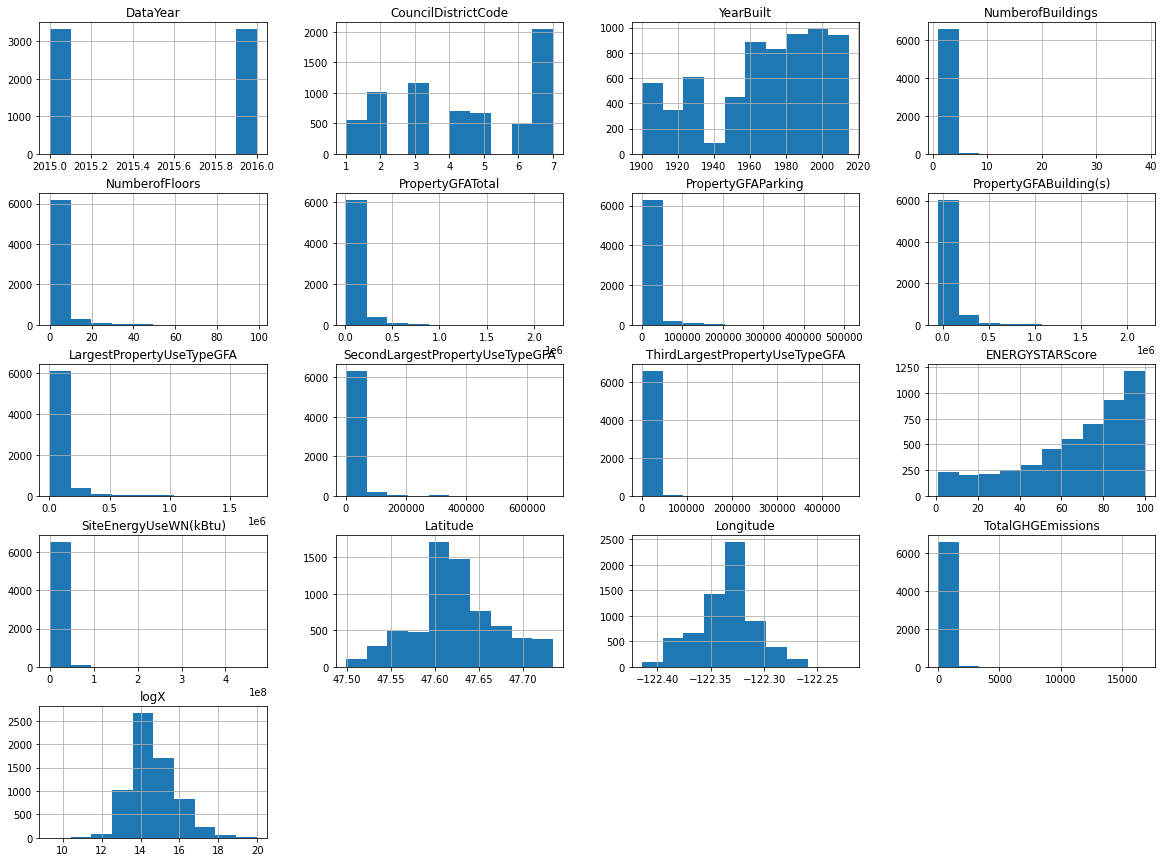

In [71]:
data.hist(figsize=(20,15))
plt.show()

In [56]:
data.corr()

DataYear  CouncilDistrictCode  YearBuilt  \
DataYear                         1.000000            -0.003354   0.012699   
CouncilDistrictCode             -0.003354             1.000000  -0.021212   
YearBuilt                        0.012699            -0.021212   1.000000   
NumberofBuildings                0.038884            -0.024705   0.008120   
NumberofFloors                   0.005057             0.246362   0.143885   
PropertyGFATotal                 0.005993             0.143452   0.182328   
PropertyGFAParking              -0.044492             0.143203   0.216269   
PropertyGFABuilding(s)           0.018419             0.126151   0.151413   
LargestPropertyUseTypeGFA        0.004967             0.114773   0.159410   
SecondLargestPropertyUseTypeGFA  0.016877             0.132869   0.176790   
ThirdLargestPropertyUseTypeGFA   0.017480             0.049789   0.056080   
ENERGYSTARScore                  0.001146             0.062769   0.020897   
SiteEnergyUseWN(kBtu)            0.003522             0.068941   0.075102   
Latitude                        -0.001557             0.490262   0.118648   
Longitude                        0.004658            -0.268015  -0.054530   
TotalGHGEmissions                0.006874             0.028979   0.030325   

                                 NumberofBuildings  NumberofFloors  \
DataYear                                  0.038884        0.005057   
CouncilDistrictCode                      -0.024705        0.246362   
YearBuilt                                 0.008120        0.143885   
NumberofBuildings                         1.000000       -0.026365   
NumberofFloors                           -0.026365        1.000000   
PropertyGFATotal                          0.200527        0.590251   
PropertyGFAParking                        0.012161        0.426419   
PropertyGFABuilding(s)                    0.225323        0.561476   
LargestPropertyUseTypeGFA                 0.223953        0.567565   
SecondLargestPropertyUseTypeGFA           0.092899        0.432581   
ThirdLargestPropertyUseTypeGFA            0.001210        0.211085   
ENERGYSTARScore                          -0.013168        0.016400   
SiteEnergyUseWN(kBtu)                     0.218509        0.314387   
Latitude                                  0.002701       -0.022358   
Longitude                                 0.018843       -0.024253   
TotalGHGEmissions                         0.198367        0.166932   

                                 PropertyGFATotal  PropertyGFAParking  \
DataYear                                 0.005993           -0.044492   
CouncilDistrictCode                      0.143452            0.143203   
YearBuilt                                0.182328            0.216269   
NumberofBuildings                        0.200527            0.012161   
NumberofFloors                           0.590251            0.426419   
PropertyGFATotal                         1.000000            0.616863   
PropertyGFAParking                       0.616863            1.000000   
PropertyGFABuilding(s)                   0.978753            0.442374   
LargestPropertyUseTypeGFA                0.952018            0.520924   
SecondLargestPropertyUseTypeGFA          0.746671            0.506692   
ThirdLargestPropertyUseTypeGFA           0.399562            0.234983   
ENERGYSTARScore                          0.059343            0.062900   
SiteEnergyUseWN(kBtu)                    0.637474            0.277071   
Latitude                                -0.038023            0.006347   
Longitude                                0.021608           -0.007674   
TotalGHGEmissions                        0.473371            0.126174   

                                 PropertyGFABuilding(s)  \
DataYear                                       0.018419   
CouncilDistrictCode                            0.126151   
YearBuilt                                      0.151413   
NumberofBuildings                              0.22532

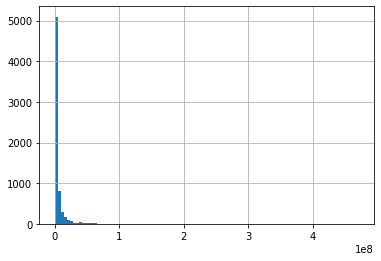

In [57]:
data['SiteEnergyUseWN(kBtu)'].hist(bins=100)

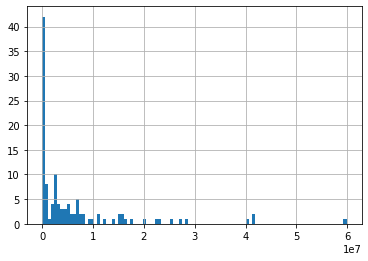

In [58]:
data[data['Outlier']!='normal']['SiteEnergyUseWN(kBtu)'].hist(bins=100)

In [59]:
outliers = data[data['Outlier']!='normal']
outliers

DataYear          BuildingType          PrimaryPropertyType  \
3         2015        NonResidential                        Hotel   
228       2015        NonResidential                 Large Office   
322       2015        NonResidential                 Large Office   
387       2015        NonResidential                 Retail Store   
450       2015        NonResidential                 Large Office   
515       2015        NonResidential                 Large Office   
516       2015        NonResidential                 Retail Store   
519       2015        NonResidential                 Large Office   
520       2015        NonResidential                 Large Office   
646       2015        NonResidential                 Large Office   
659       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
702       2015        NonResidential  Small- and Mid-Sized Office   
726       2015  Multifamily HR (10+)        High-Rise Multifamily   
745       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
784       2015        NonResidential                 Retail Store   
804       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
828       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
837       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
845       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
878       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
896       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
975       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
992       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1152      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1160      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1239      2015        NonResidential  Small- and Mid-Sized Office   
1249      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1283      2015        NonResidential  Small- and Mid-Sized Office   
1294      2015        NonResidential  Small- and Mid-Sized Office   
1327      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1352      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1418      2015        NonResidential  Small- and Mid-Sized Office   
1543      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1577      2015        NonResidential  Small- and Mid-Sized Office   
1611      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1759      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1760      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1761      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1764      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1796      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1864      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1907      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1966      2015        NonResidential  Small- and Mid-Sized Office   
1981      2015        NonResidential  Small- and Mid-Sized Office   
2055      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2070      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2277      2015  Multifamily HR (10+)        High-Rise Multifamily   
2379      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2438      2015        NonResidential                        Hotel   
2460      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2470      2015        NonResidential  Small- and Mid-Sized Office   
2508      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2536      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2627      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2707      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2712      2015        NonResidential  Small- and Mid-Sized Office   
2722      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2739

In [60]:
upperlim = data['SiteEnergyUseWN(kBtu)'].quantile(0.995)
lowerlim = data['SiteEnergyUseWN(kBtu)'].quantile(0.005)
outliers[outliers['SiteEnergyUseWN(kBtu)']>upperlim]

Empty DataFrame
Columns: [DataYear, BuildingType, PrimaryPropertyType, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUseWN(kBtu), ComplianceStatus, Outlier, Latitude, Longitude, TotalGHGEmissions]
Index: []

In [61]:
outliers[outliers['SiteEnergyUseWN(kBtu)']<lowerlim]

DataYear          BuildingType          PrimaryPropertyType  \
1239      2015        NonResidential  Small- and Mid-Sized Office   
4569      2016        NonResidential  Small- and Mid-Sized Office   
4635      2016        NonResidential                        Other   
4951      2016        NonResidential             Worship Facility   
5529      2016        NonResidential                        Other   
6141      2016        NonResidential             Worship Facility   
6492      2016    Nonresidential COS                        Other   
6681      2016  Multifamily MR (5-9)         Mid-Rise Multifamily   

      CouncilDistrictCode      Neighborhood  YearBuilt  NumberofBuildings  \
1239                    7          DOWNTOWN       1903                1.0   
4569                    7          DOWNTOWN       1903                1.0   
4635                    7          DOWNTOWN       1900                1.0   
4951                    1         SOUTHWEST       1971                1.0   
5529                    2  GREATER DUWAMISH       1910                1.0   
6141                    4         NORTHEAST       1954                1.0   
6492                    2  GREATER DUWAMISH       1906                1.0   
6681                    3              EAST       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1239             3.0             57720                   0   
4569             3.0             57720                   0   
4635             3.0             49760                   0   
4951             1.0             23772                   0   
5529             3.0             27690                   0   
6141             2.0             20039                   0   
6492             2.0             39212                   0   
6681             7.0             41384               15062   

      PropertyGFABuilding(s) LargestPropertyUseType  \
1239                   57720                 Office   
4569                   57720                 Office   
4635                   49760                  Other   
4951                   23772       Worship Facility   
5529                   27690                  Other   
6141                   20039       Worship Facility   
6492                   39212                  Other   
6681                   26322    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1239                    25000.0                       No Use   
4569                    25000.0                       No Use   
4635                    24019.0                       No Use   
4951                    23772.0                       No Use   
5529                    24717.0                      Parking   
6141                    20039.0                       No Use   
6492                    39212.0                       No Use   
6681                    34643.0                      Parking   

      SecondLargestPropertyUseTypeGFA  \
1239                              0.0   
4569                              0.0   
4635                              0.0   
4951                              0.0   
5529                              0.0   
6141                              0.0   
6492                              0.0   
6681                           8266.0   

                               ThirdLargestPropertyUseType  \
1239                                                No Use   
4569                                                No Use   
4635                                                No Use   
4951                                                No Use   
5529                                                No Use   
6141                                                No Use   
6492                                                No Use   
6681  Personal Services (Health/Beauty, Dry Cleaning, etc)   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
1239                             0.0            1

##Transform the target value using log to reveal a Gaussian distribution

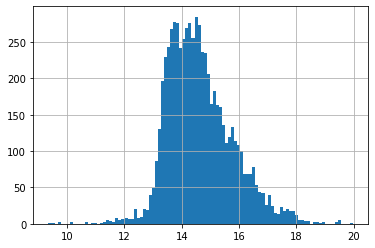

In [62]:
data['logX']=np.log(data['SiteEnergyUseWN(kBtu)'])
data['logX'].hist(bins=100)

#Ensemble de données nettoyé

In [63]:
data

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         2015      NonResidential               Hotel                    7   
1         2015      NonResidential               Hotel                    7   
2         2015      NonResidential               Hotel                    7   
3         2015      NonResidential               Hotel                    7   
4         2015      NonResidential               Hotel                    7   
...        ...                 ...                 ...                  ...   
6711      2016  Nonresidential COS              Office                    2   
6712      2016  Nonresidential COS               Other                    2   
6713      2016  Nonresidential COS               Other                    7   
6714      2016  Nonresidential COS  Mixed Use Property                    1   
6715      2016  Nonresidential COS  Mixed Use Property                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0            12.0   
1                  DOWNTOWN       1996                1.0            11.0   
2                  DOWNTOWN       1969                1.0            41.0   
3                  DOWNTOWN       1926                1.0            10.0   
4                  DOWNTOWN       1980                1.0            18.0   
...                     ...        ...                ...             ...   
6711       GREATER DUWAMISH       1990                1.0             1.0   
6712               DOWNTOWN       2004                1.0             1.0   
6713  MAGNOLIA / QUEEN ANNE       1974                1.0             1.0   
6714       GREATER DUWAMISH       1989                1.0             1.0   
6715       GREATER DUWAMISH       1938                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               961990                   0                  961990   
3                61320                   0                   61320   
4               119890               12460                  107430   
...                ...                 ...                     ...   
6711             12294                   0                   12294   
6712             16000                   0                   16000   
6713             13157                   0                   13157   
6714             14101                   0                   14101   
6715             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   757243.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
6711                 Office                    12294.0   
6712     Other - Recreation                    16000.0   
6713     Other - Recreation                     7583.0   
6714     Other - Recreation                     6601.0   
6715     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                             No Use                              0.0   
1                            Parking                          15064.0   
2                            Parking                         100000.0   
3                             No Use                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
6711                          No Use                              0.0   
6712      

In [64]:
data.shape

(6655, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


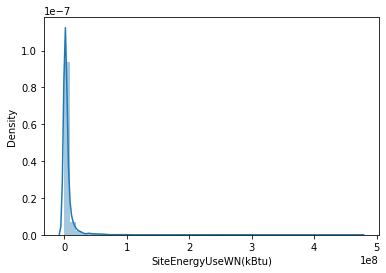

In [67]:
sns.distplot(data['SiteEnergyUseWN(kBtu)'].dropna())

###**Boîtes à moustaches**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


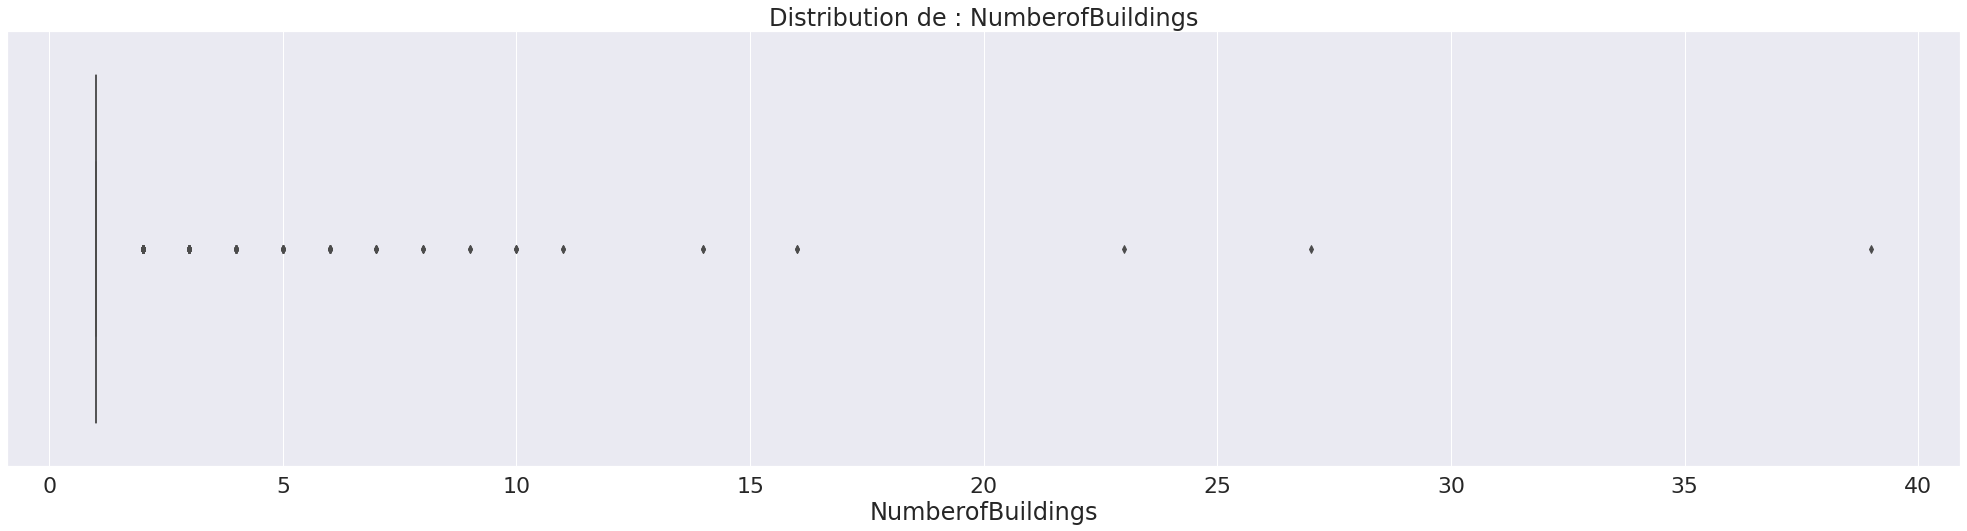

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


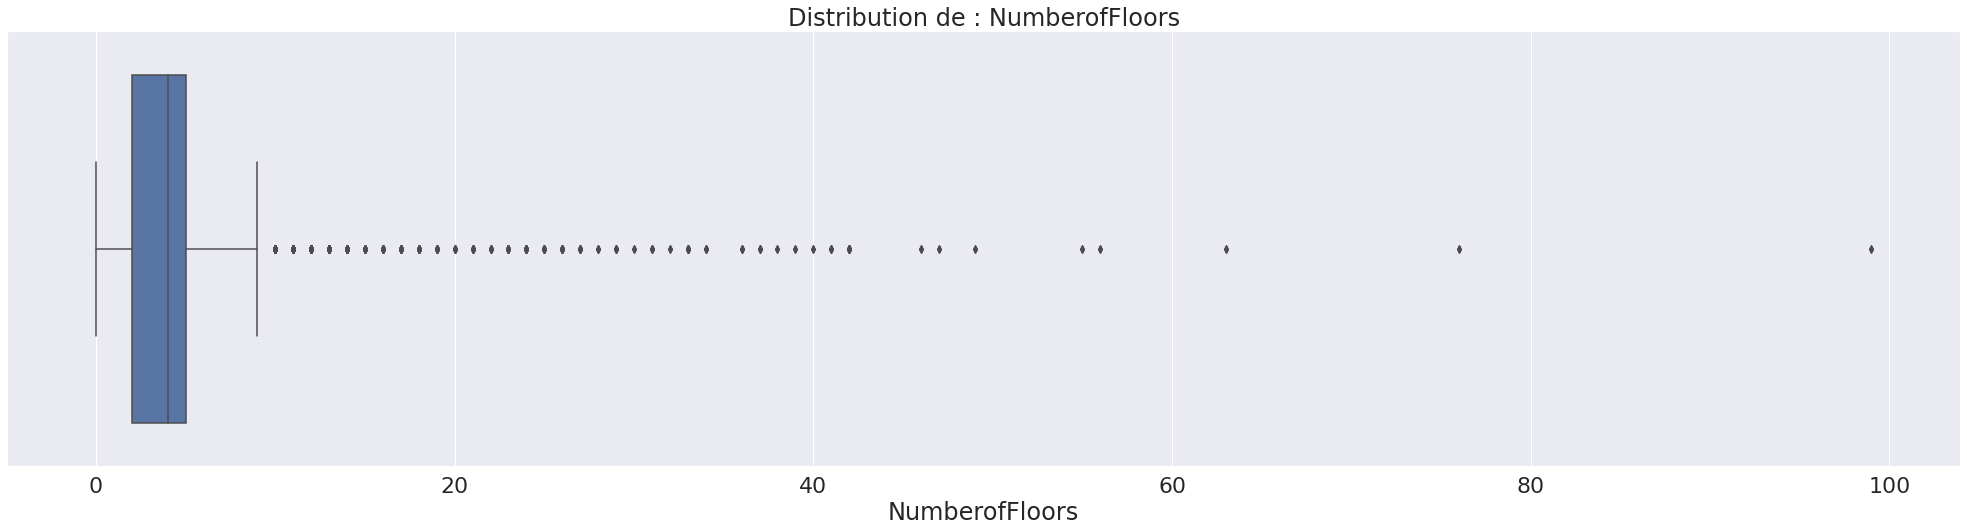

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


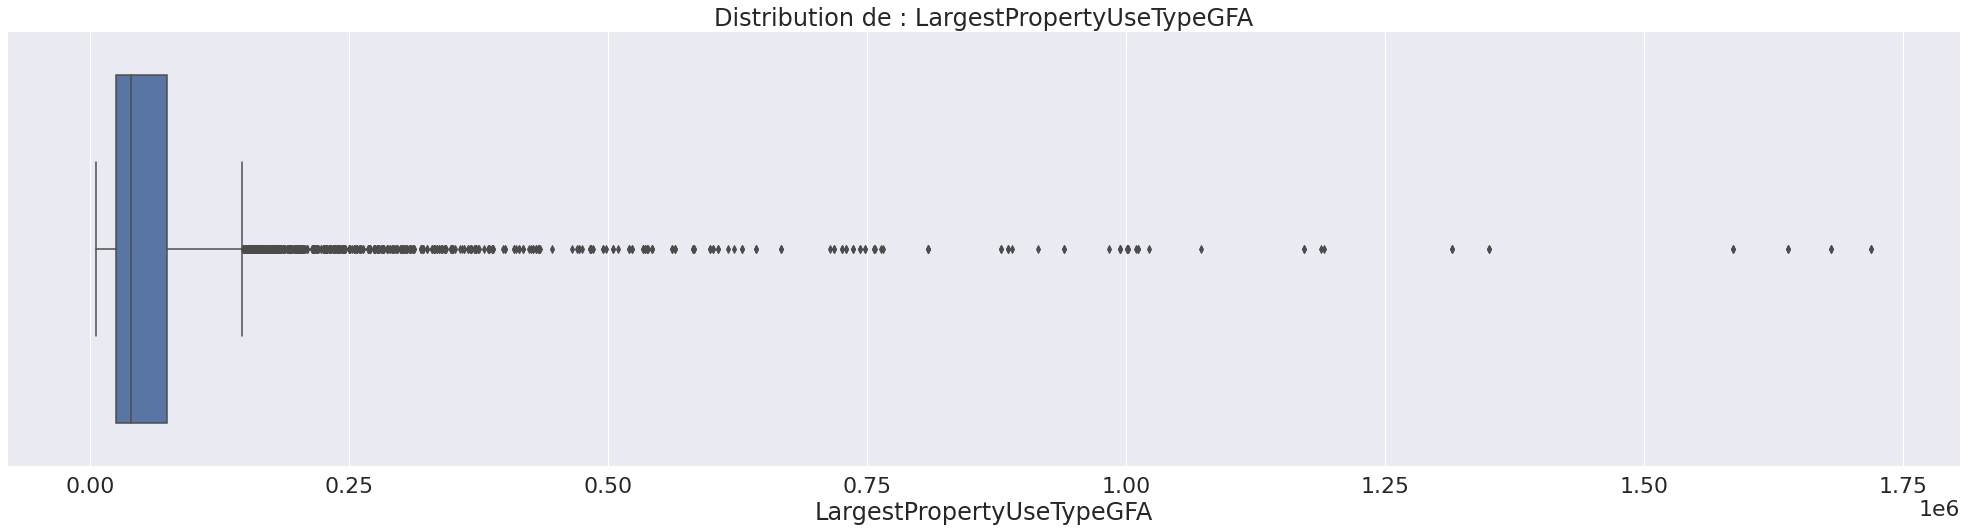

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


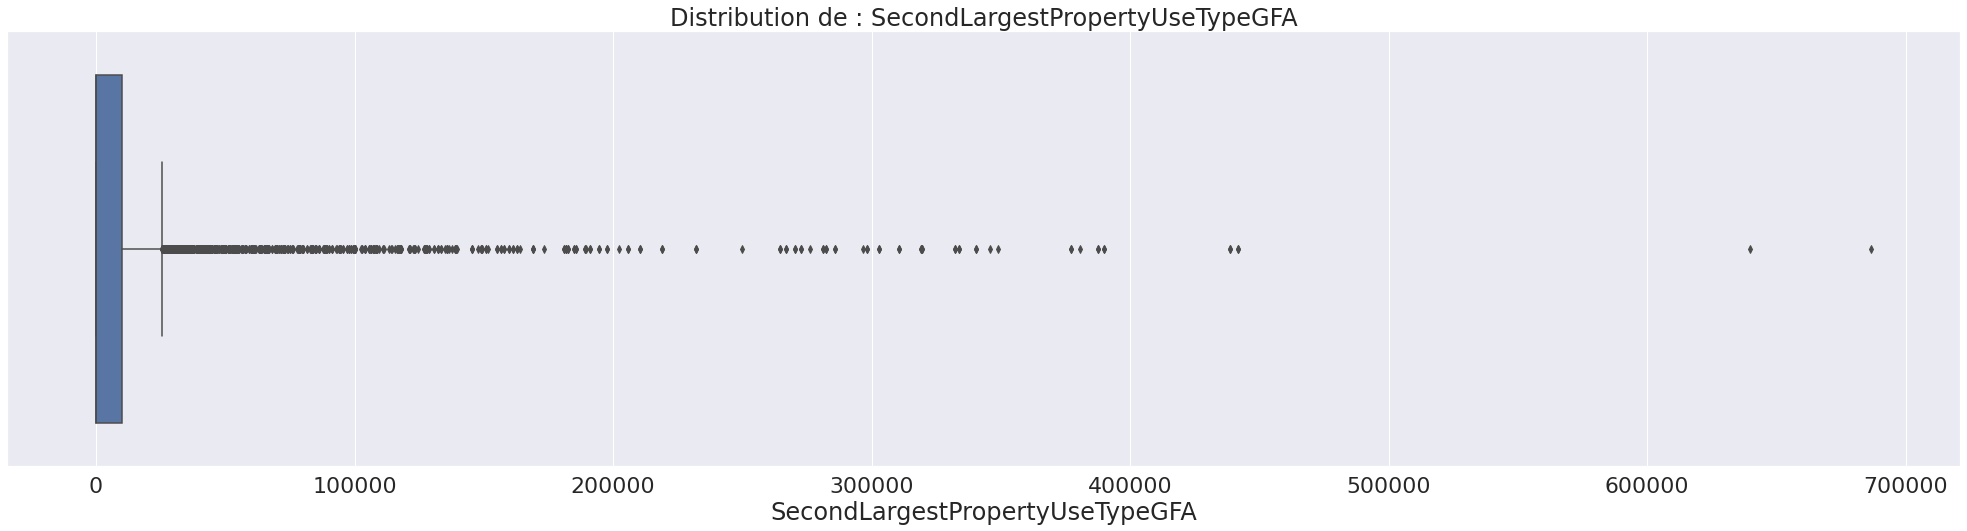

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


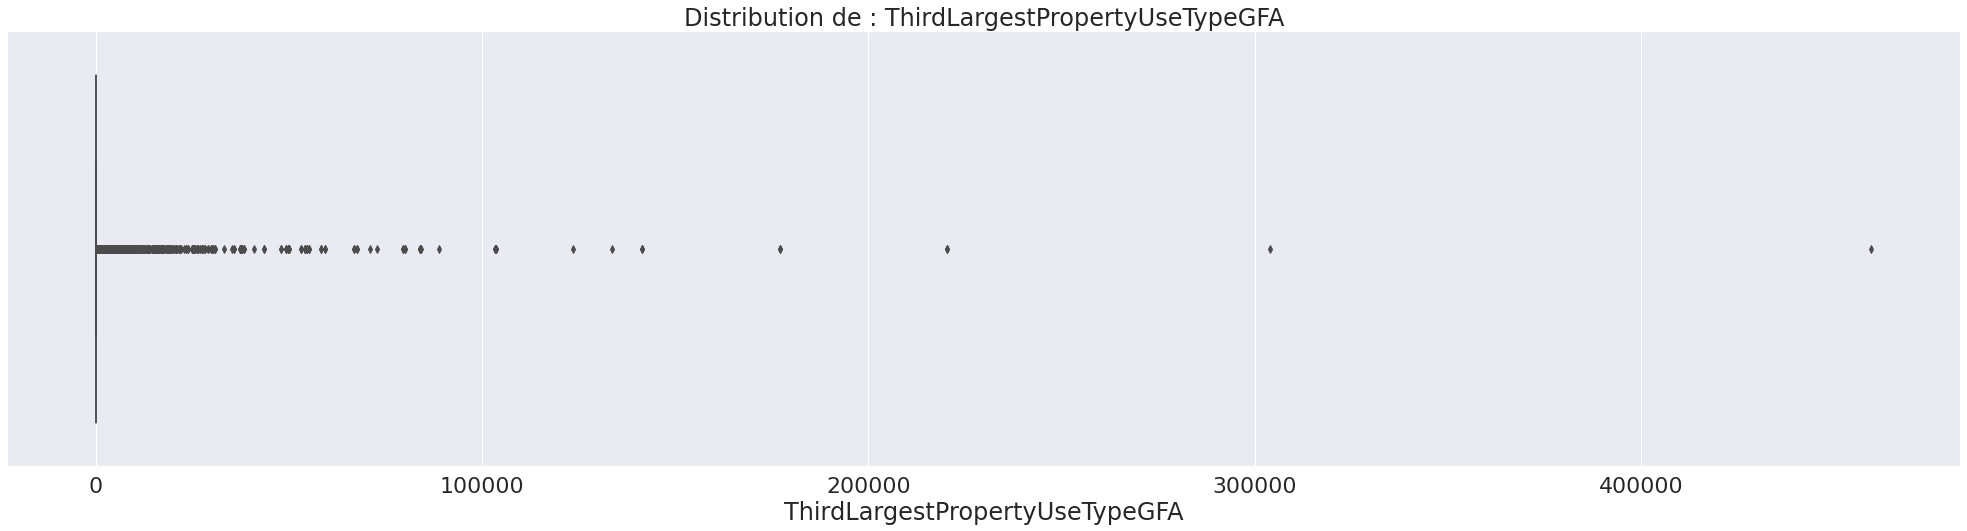

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


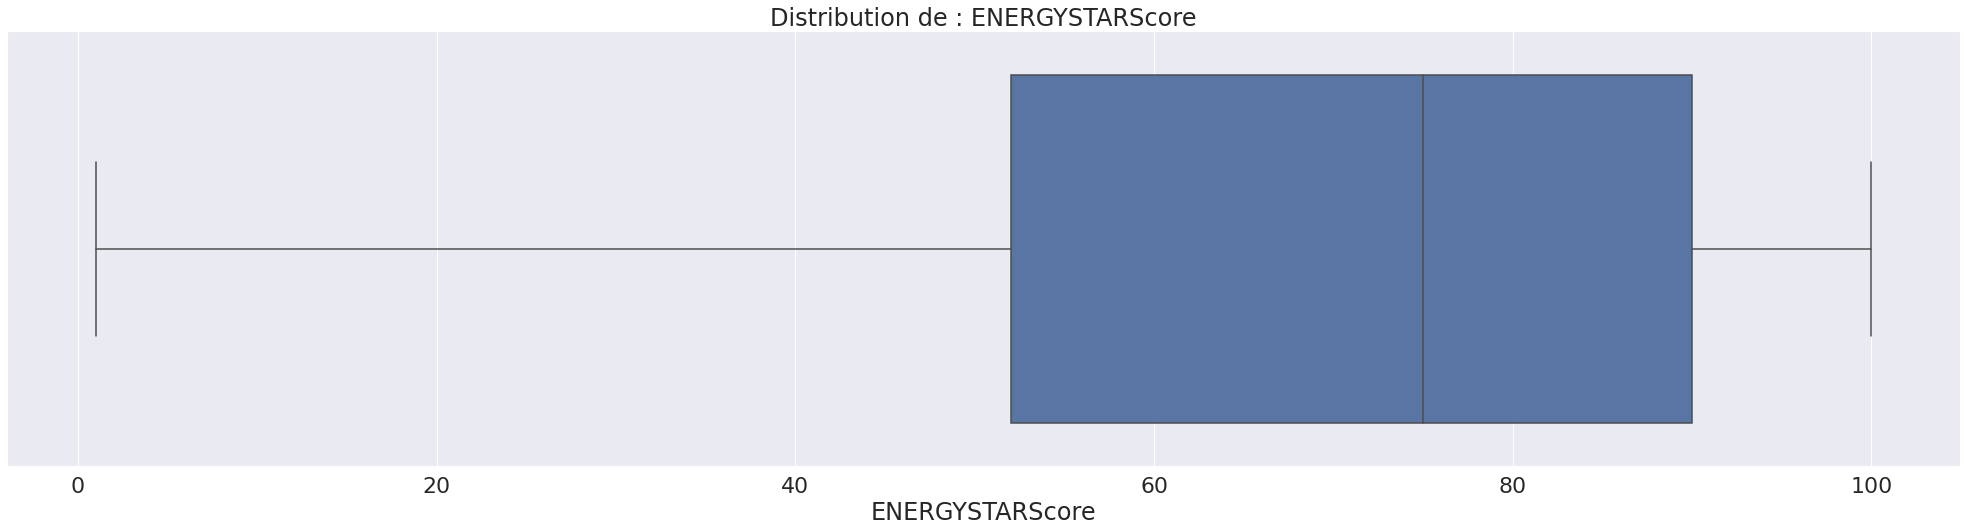

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


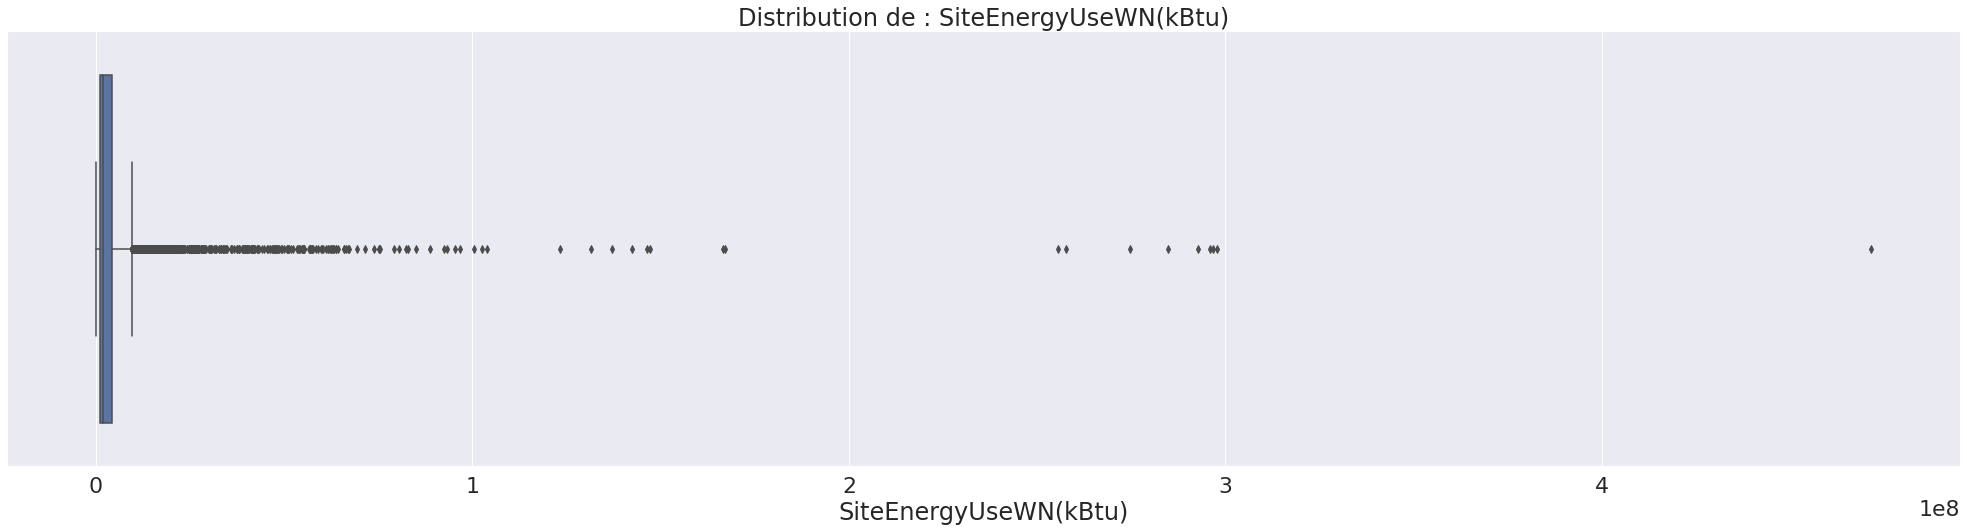

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


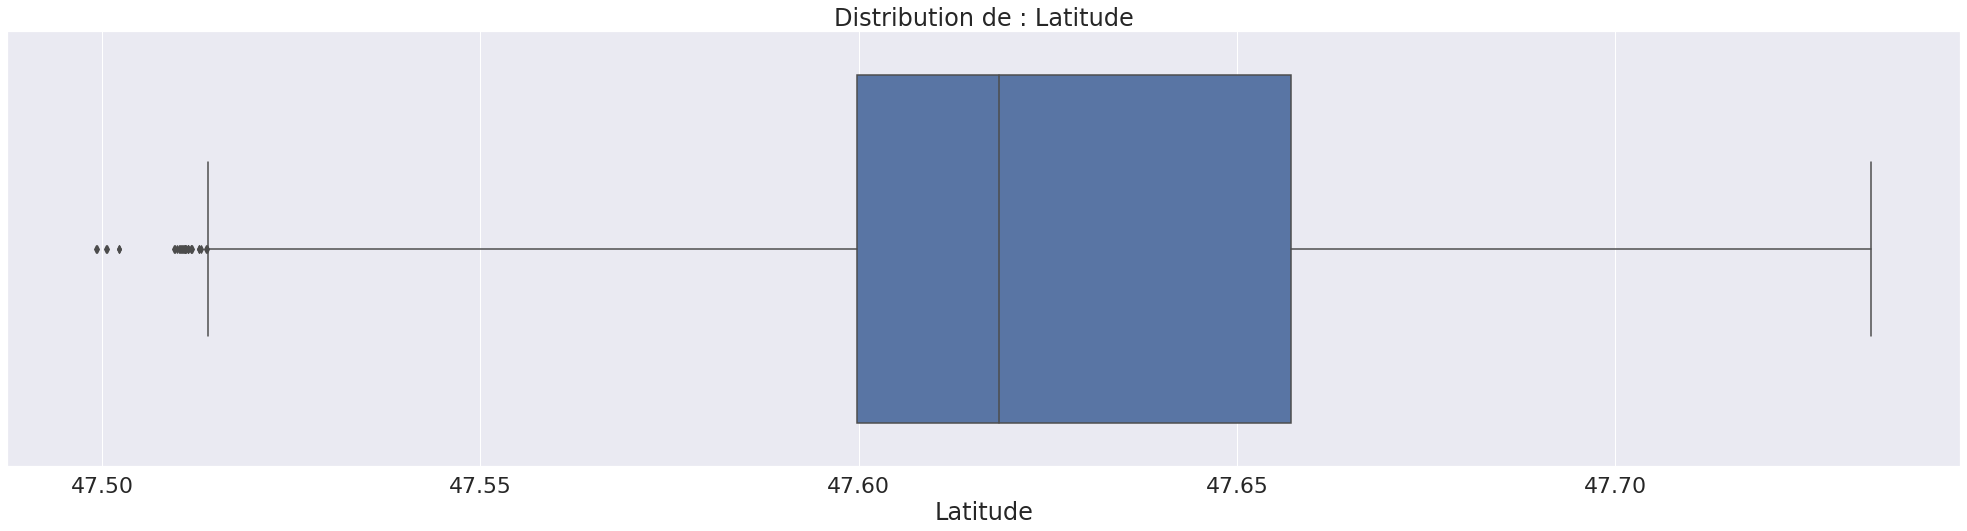

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


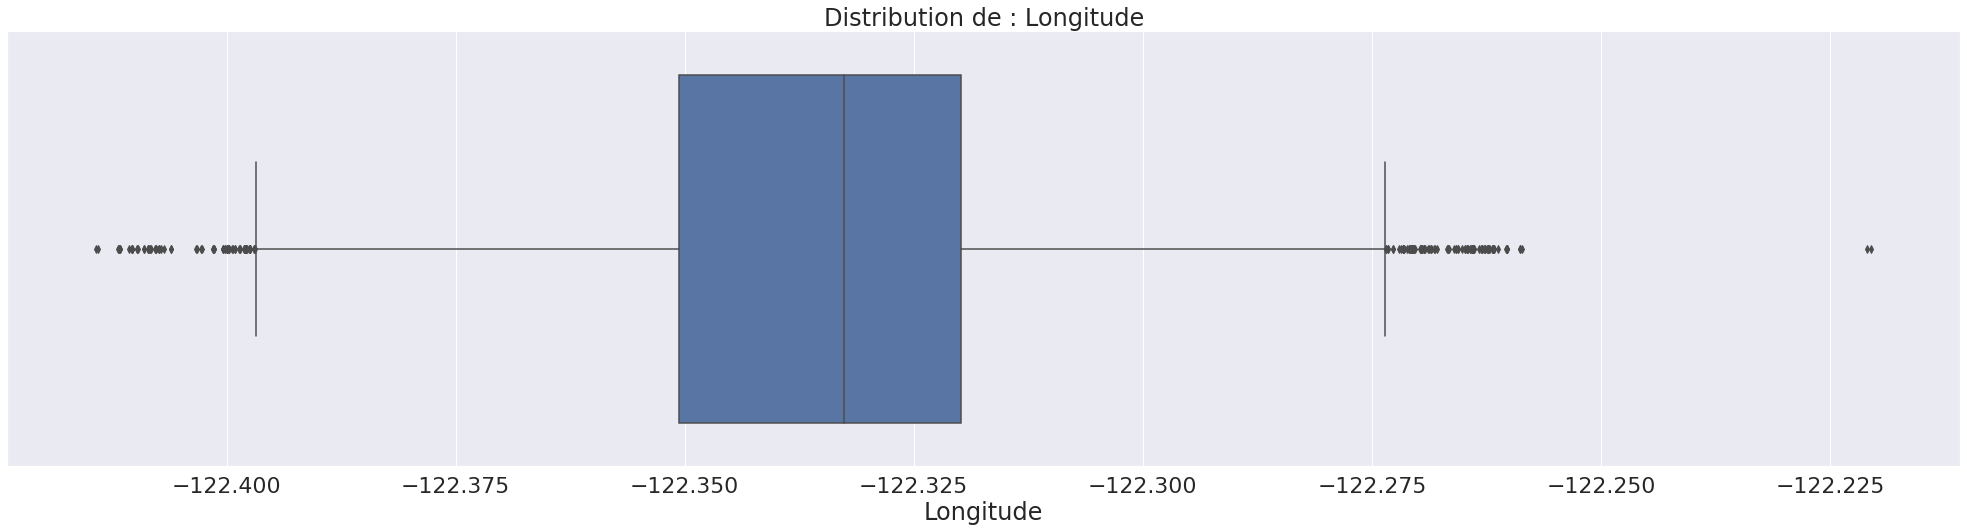

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


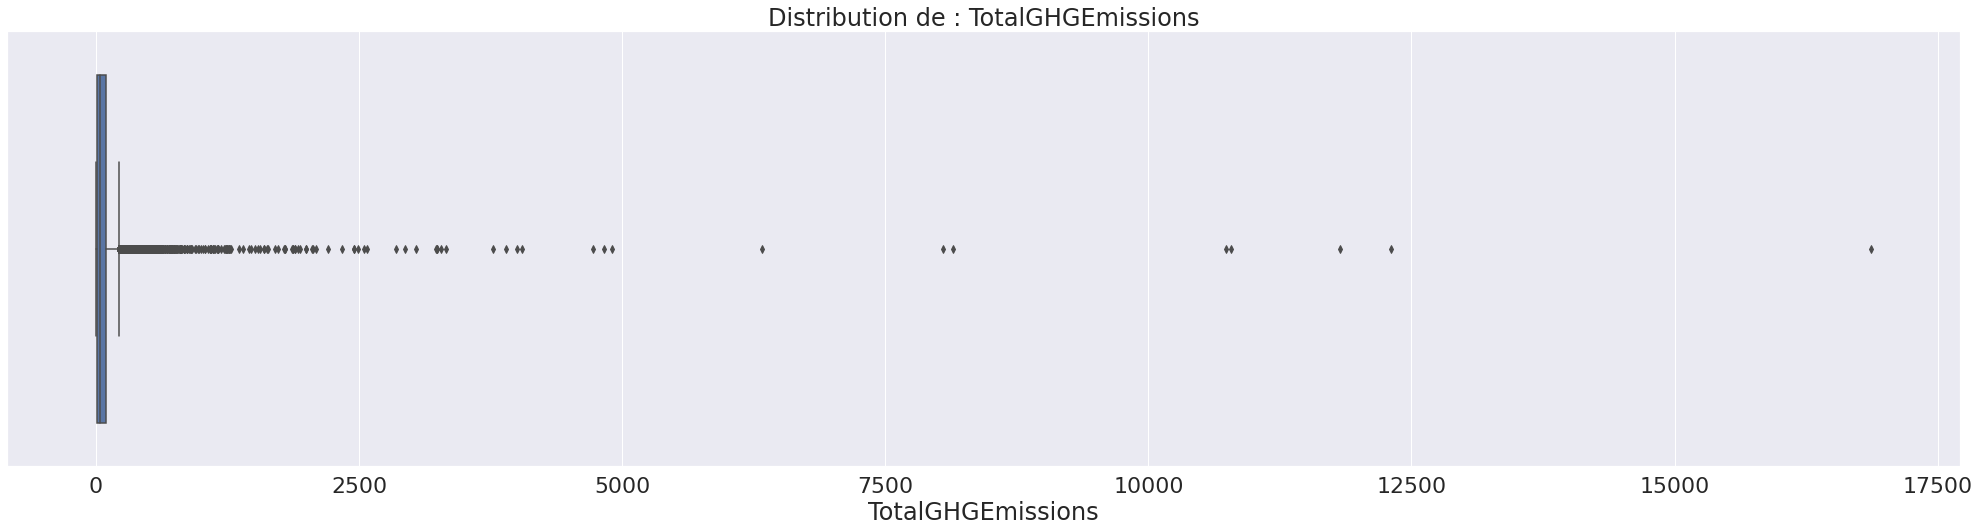

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


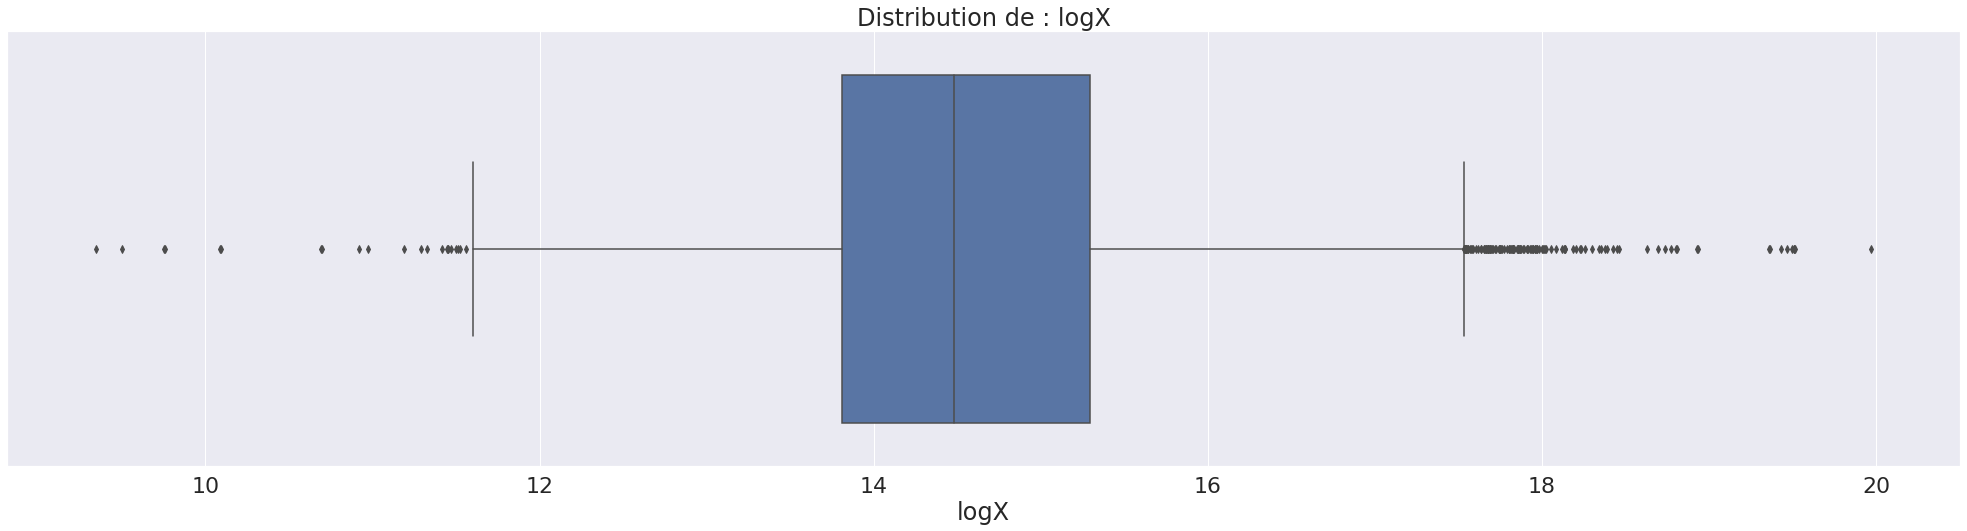

In [72]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (35,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

#**Analyse multivariée**
**Matrice de corrélation**

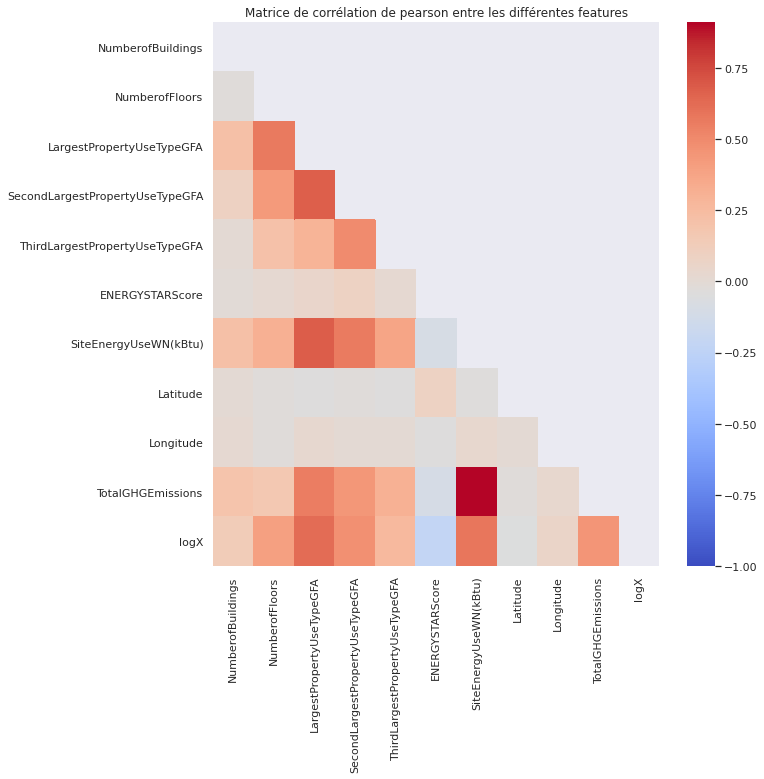

In [73]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

Corrélation importante entre TotalGHEmissions et SiteEnergyUseWN(kBtu) (on notera que ce sont les deux variables qu'on cherche à prédire, ce qui laisse présager)**texte en gras**

In [74]:
data.to_csv('data_cleaned.csv', index=False)